<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Demand=ctrl.Antecedent(np.arange(0,101,1),'Demand')
Competitor_pricing=ctrl.Antecedent(np.arange(0,10,1),'Competitor_pricing')
Production_cost=ctrl.Antecedent(np.arange(0,101,1),'Production_cost')
Seasonality=ctrl.Antecedent(np.arange(0,13,1),'Seasonality')
Stock=ctrl.Antecedent(np.arange(0,11,1),'Stock')
final_price=ctrl.Consequent(np.arange(0,101,1),'final_price')

Demand['low']=fuzz.trimf(Demand.universe,[0,0,50])
Demand['medium']=fuzz.trimf(Demand.universe,[49,50,75])
Demand['high']=fuzz.trimf(Demand.universe,[70,100,100])

Competitor_pricing['low']=fuzz.trimf(Competitor_pricing.universe,[0,0,3])
Competitor_pricing['medium']=fuzz.trimf(Competitor_pricing.universe,[3,5,6])
Competitor_pricing['high']=fuzz.trimf(Competitor_pricing.universe,[6,8,9])

Production_cost['low']=fuzz.trimf(Production_cost.universe,[0,0,30])
Production_cost['medium']=fuzz.trimf(Production_cost.universe,[30,40,60])
Production_cost['high']=fuzz.trimf(Production_cost.universe,[60,80,100])

Seasonality['off']=fuzz.trimf(Seasonality.universe,[0,3,6])
Seasonality['normal']=fuzz.trimf(Seasonality.universe,[5,6,9])
Seasonality['peak']=fuzz.trimf(Seasonality.universe,[8,9,12])

Stock['low']=fuzz.trimf(Stock.universe,[0,0,4])
Stock['medium']=fuzz.trimf(Stock.universe,[3,5,7])
Stock['high']=fuzz.trimf(Stock.universe,[6,10,10])

final_price['very_low']=fuzz.trimf(final_price.universe,[0,10,20])
final_price['low']=fuzz.trimf(final_price.universe,[15,30,40])
final_price['medium']=fuzz.trimf(final_price.universe,[39,50,70])
final_price['high']=fuzz.trimf(final_price.universe,[65,70,90])
final_price['very_high']=fuzz.trimf(final_price.universe,[80,100,100])

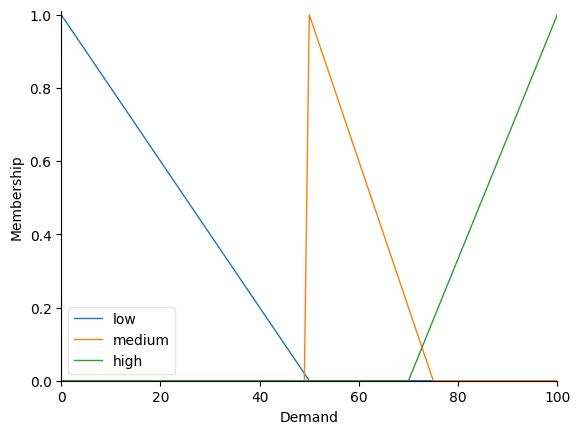

In [ ]:
Demand.view()

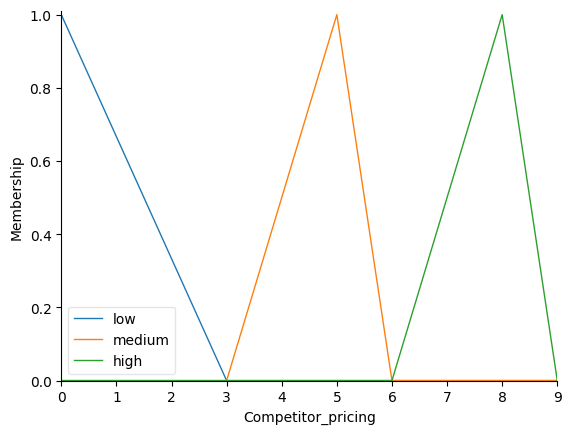

In [ ]:
Competitor_pricing.view()

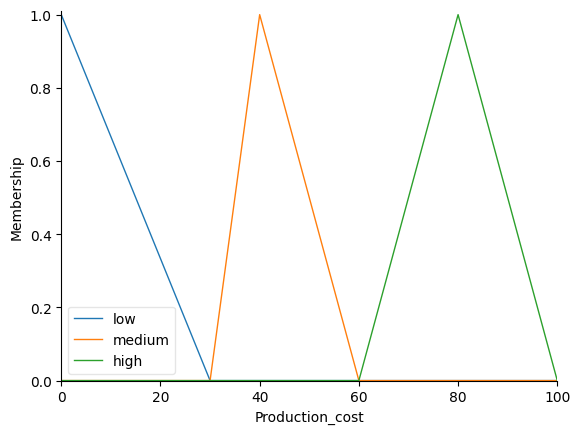

In [ ]:
Production_cost.view()

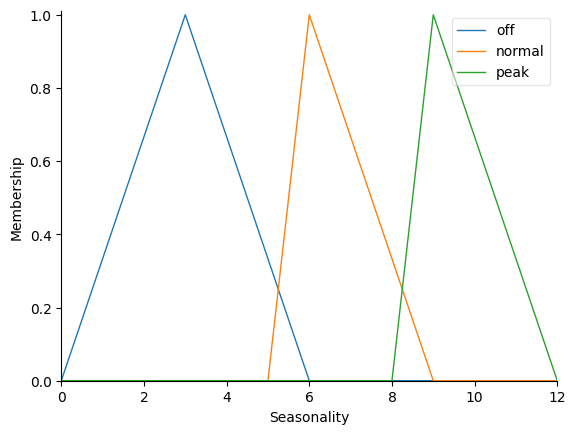

In [ ]:
Seasonality.view()

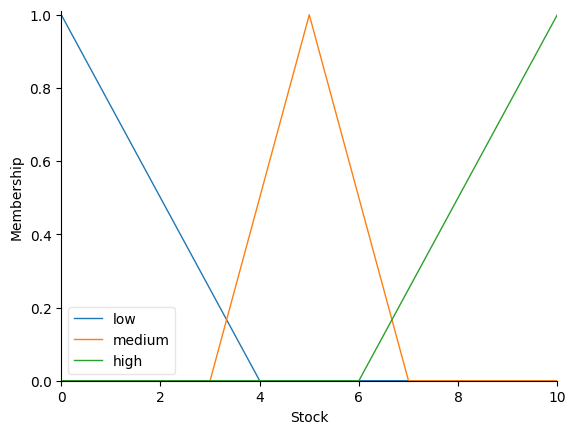

In [ ]:
Stock.view()

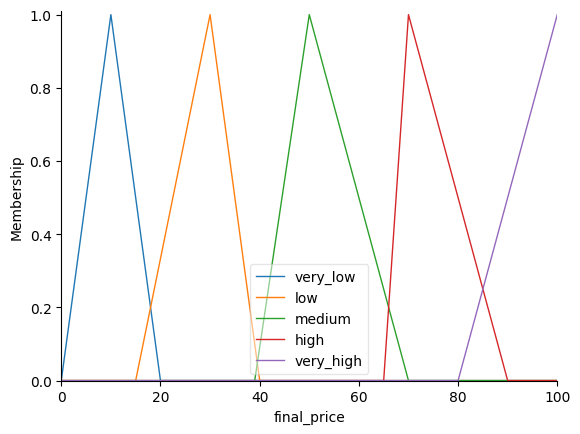

In [ ]:
final_price.view()

In [ ]:
rule1=ctrl.Rule(Demand['high']&Competitor_pricing['high']&Stock['low'],final_price['very_high'])
rule2=ctrl.Rule(Demand['high']&Seasonality['peak']&Stock['low'],final_price['very_high'])
rule3=ctrl.Rule(Demand['medium']&Production_cost['high']&Stock['low'],final_price['very_high'])

rule4=ctrl.Rule(Demand['high']&Competitor_pricing['medium']&Stock['medium'],final_price['high'])
rule5=ctrl.Rule(Demand['medium']&Competitor_pricing['high']&Stock['low'],final_price['high'])
rule6=ctrl.Rule(Demand['medium']&Seasonality['peak']&Stock['medium'],final_price['high'])

rule7=ctrl.Rule(Demand['medium']&Competitor_pricing['medium']&Stock['medium'],final_price['medium'])
rule8=ctrl.Rule(Demand['low']&Competitor_pricing['high']&Stock['medium'],final_price['medium'])
rule9=ctrl.Rule(Demand['medium']&Production_cost['medium']&Stock['medium'],final_price['medium'])

rule10=ctrl.Rule(Demand['low']&Competitor_pricing['low']&Stock['high'],final_price['low'])
rule11=ctrl.Rule(Demand['medium']&Production_cost['low']&Stock['high'],final_price['low'])
rule12=ctrl.Rule(Demand['low']&Seasonality['off']&Stock['high'],final_price['low'])

rule13=ctrl.Rule(Demand['low']&Competitor_pricing['low']&Stock['high'],final_price['very_low'])
rule14=ctrl.Rule(Demand['low']&Seasonality['off']&Stock['high'],final_price['very_low'])
rule15=ctrl.Rule(Demand['medium']&Competitor_pricing['low']&Stock['high'],final_price['very_low'])

giá cuối cùng: 53.5


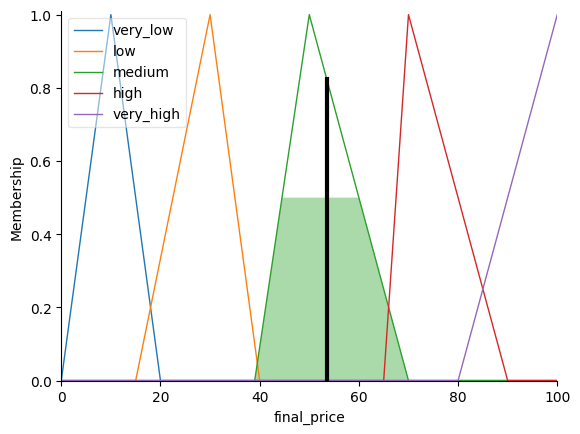

In [ ]:
fuzzy_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_ctrl_sim=ctrl.ControlSystemSimulation(fuzzy_ctrl)
fuzzy_ctrl_sim.input['Demand']=5
fuzzy_ctrl_sim.input['Competitor_pricing']=7
fuzzy_ctrl_sim.input['Production_cost']=99
fuzzy_ctrl_sim.input['Seasonality']=8
fuzzy_ctrl_sim.input['Stock']=6
fuzzy_ctrl_sim.compute()
print(f"giá cuối cùng: {fuzzy_ctrl_sim.output['final_price']}")
final_price.view(sim=fuzzy_ctrl_sim)